In [72]:
import airportsdata
import numpy as np
import networkx as nx
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [91]:
def draw_flights_on_map(airline_network, axis):
    pos = {}
    for i in airline_network:
        longtitude = airports[i]['lon']
        latitude = airports[i]['lat']
        map_long, map_lat = m(longtitude,latitude)
        pos[i] = (longtitude, latitude)
    n_flights = np.fromiter(nx.get_edge_attributes(airline_network, 'value').values(),dtype=int)
    rgba_colors = list(n_flights/np.max(n_flights))
    # edges,n_flights = zip(*nx.get_edge_attributes(g,'value').items())
    nx.draw_networkx_nodes(airline_network,pos,
                           nodelist=airline_network.nodes(),
                           node_size=3,
                           node_color='red',
                           alpha=0.5,
                          ax=axis)
    nx.draw_networkx_edges(airline_network,pos,
                           edgelist = airline_network.edges(),
                           edge_color=rgba_colors,
                           alpha=0.1,
                          ax=axis)
    m.drawcoastlines(ax=axis)

    m.drawcountries(ax=axis)


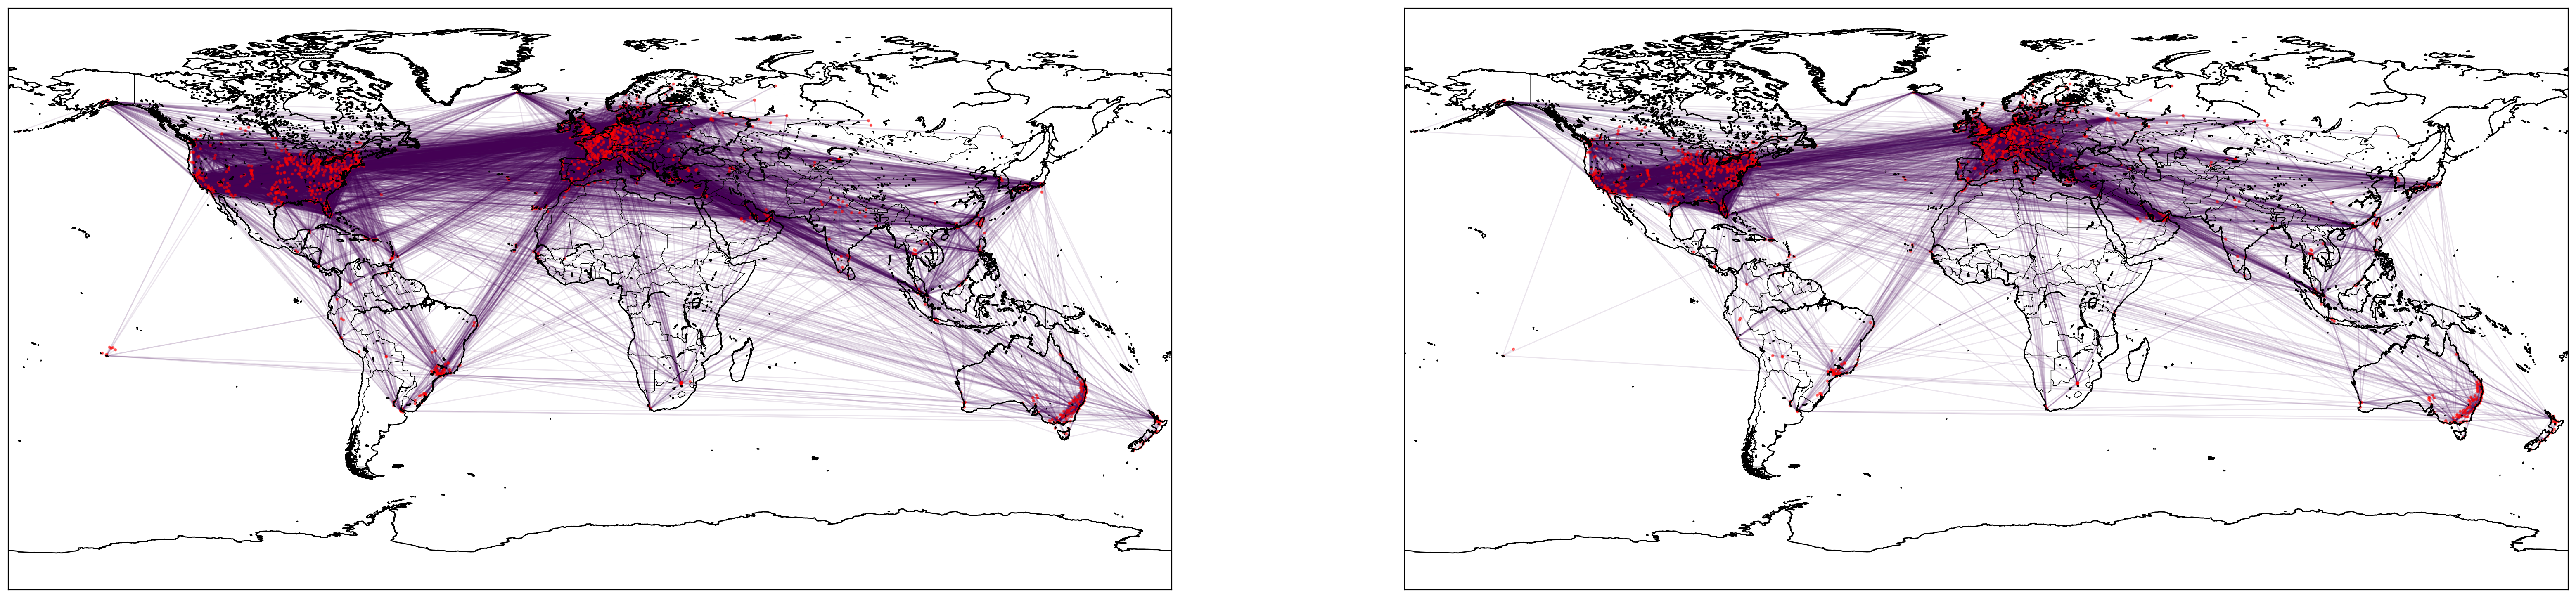

In [96]:
fig, axs = plt.subplots(1,2, figsize=(40,20), dpi=200)
g_2019 = nx.read_gml("flightlist_20191201_20191231.gml", label="label")
g_2019.remove_edges_from(nx.selfloop_edges(g_2019))
draw_flights_on_map(g_2019,axs[0])
g_2020_apr = nx.read_gml("flightlist_20200401_20200430.gml", label="label")
g_2020_apr.remove_edges_from(nx.selfloop_edges(g_2020_apr))
draw_flights_on_map(g_2020_apr,axs[1])